In [1]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(argparse))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(doParallel))
suppressPackageStartupMessages(library(qvalue))
suppressPackageStartupMessages(library(pROC))
suppressPackageStartupMessages(library(pryr))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(SparseM))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(MASS))
suppressPackageStartupMessages(library(lmtest))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(tidyverse))
options(bitmapType = 'cairo', device = 'png')

In [2]:
cohorts <- c("German1", "German2", "German3", "German4", "German5", "CG", "LURIC", "MG", "WTCCC")

In [3]:
tmp <- get(load("/cloud/wwu1/h_fungenpsy/AGZiller_data/CASTOMiGEx/CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_featAssociation.RData"))

featRel <- tmp$test_feat
featRel <- do.call(rbind, featRel)
featRel <- featRel[featRel$pval <= 0.01, ]
featRel$new_id <- paste(featRel$feat, featRel$comp, featRel$tissue, sep = '_')

ukbb <- select(featRel, new_id, comp, estimates, pval_corr) %>% mutate(cohort = "UKBB")

rownames(ukbb) <- NULL

ukbb <- rename(ukbb, estimates_ukbb = estimates)

In [4]:
cohorts_pw <- list()

for (h in cohorts) {
  tmp <- get(load(sprintf("/scratch/tmp/dolgalev/castom-igex-revision/OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/%s/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_featAssociation.RData", h)))
  
  featRel <- tmp$test_feat
  
  featRel <- do.call(rbind, featRel)
  featRel <- featRel[featRel$pval <= 0.01, ]
  featRel$new_id <- paste(featRel$feat, featRel$comp, featRel$tissue, sep = '_')
  
  x <- select(featRel, new_id, comp, estimates, pval_corr) %>% mutate(cohort = h)
  
  cohorts_pw[[h]] <- x
}

cohorts_pw <- do.call(rbind, cohorts_pw)

rownames(cohorts_pw) <- NULL

In [5]:
cohorts_pwu <- merge(cohorts_pw, select(ukbb, new_id, estimates_ukbb), by = "new_id")

In [6]:
nrow(cohorts_pwu)

[1] 3068

In [7]:
length(unique(cohorts_pwu$new_id))

[1] 772

`geom_smooth()` using formula = 'y ~ x'


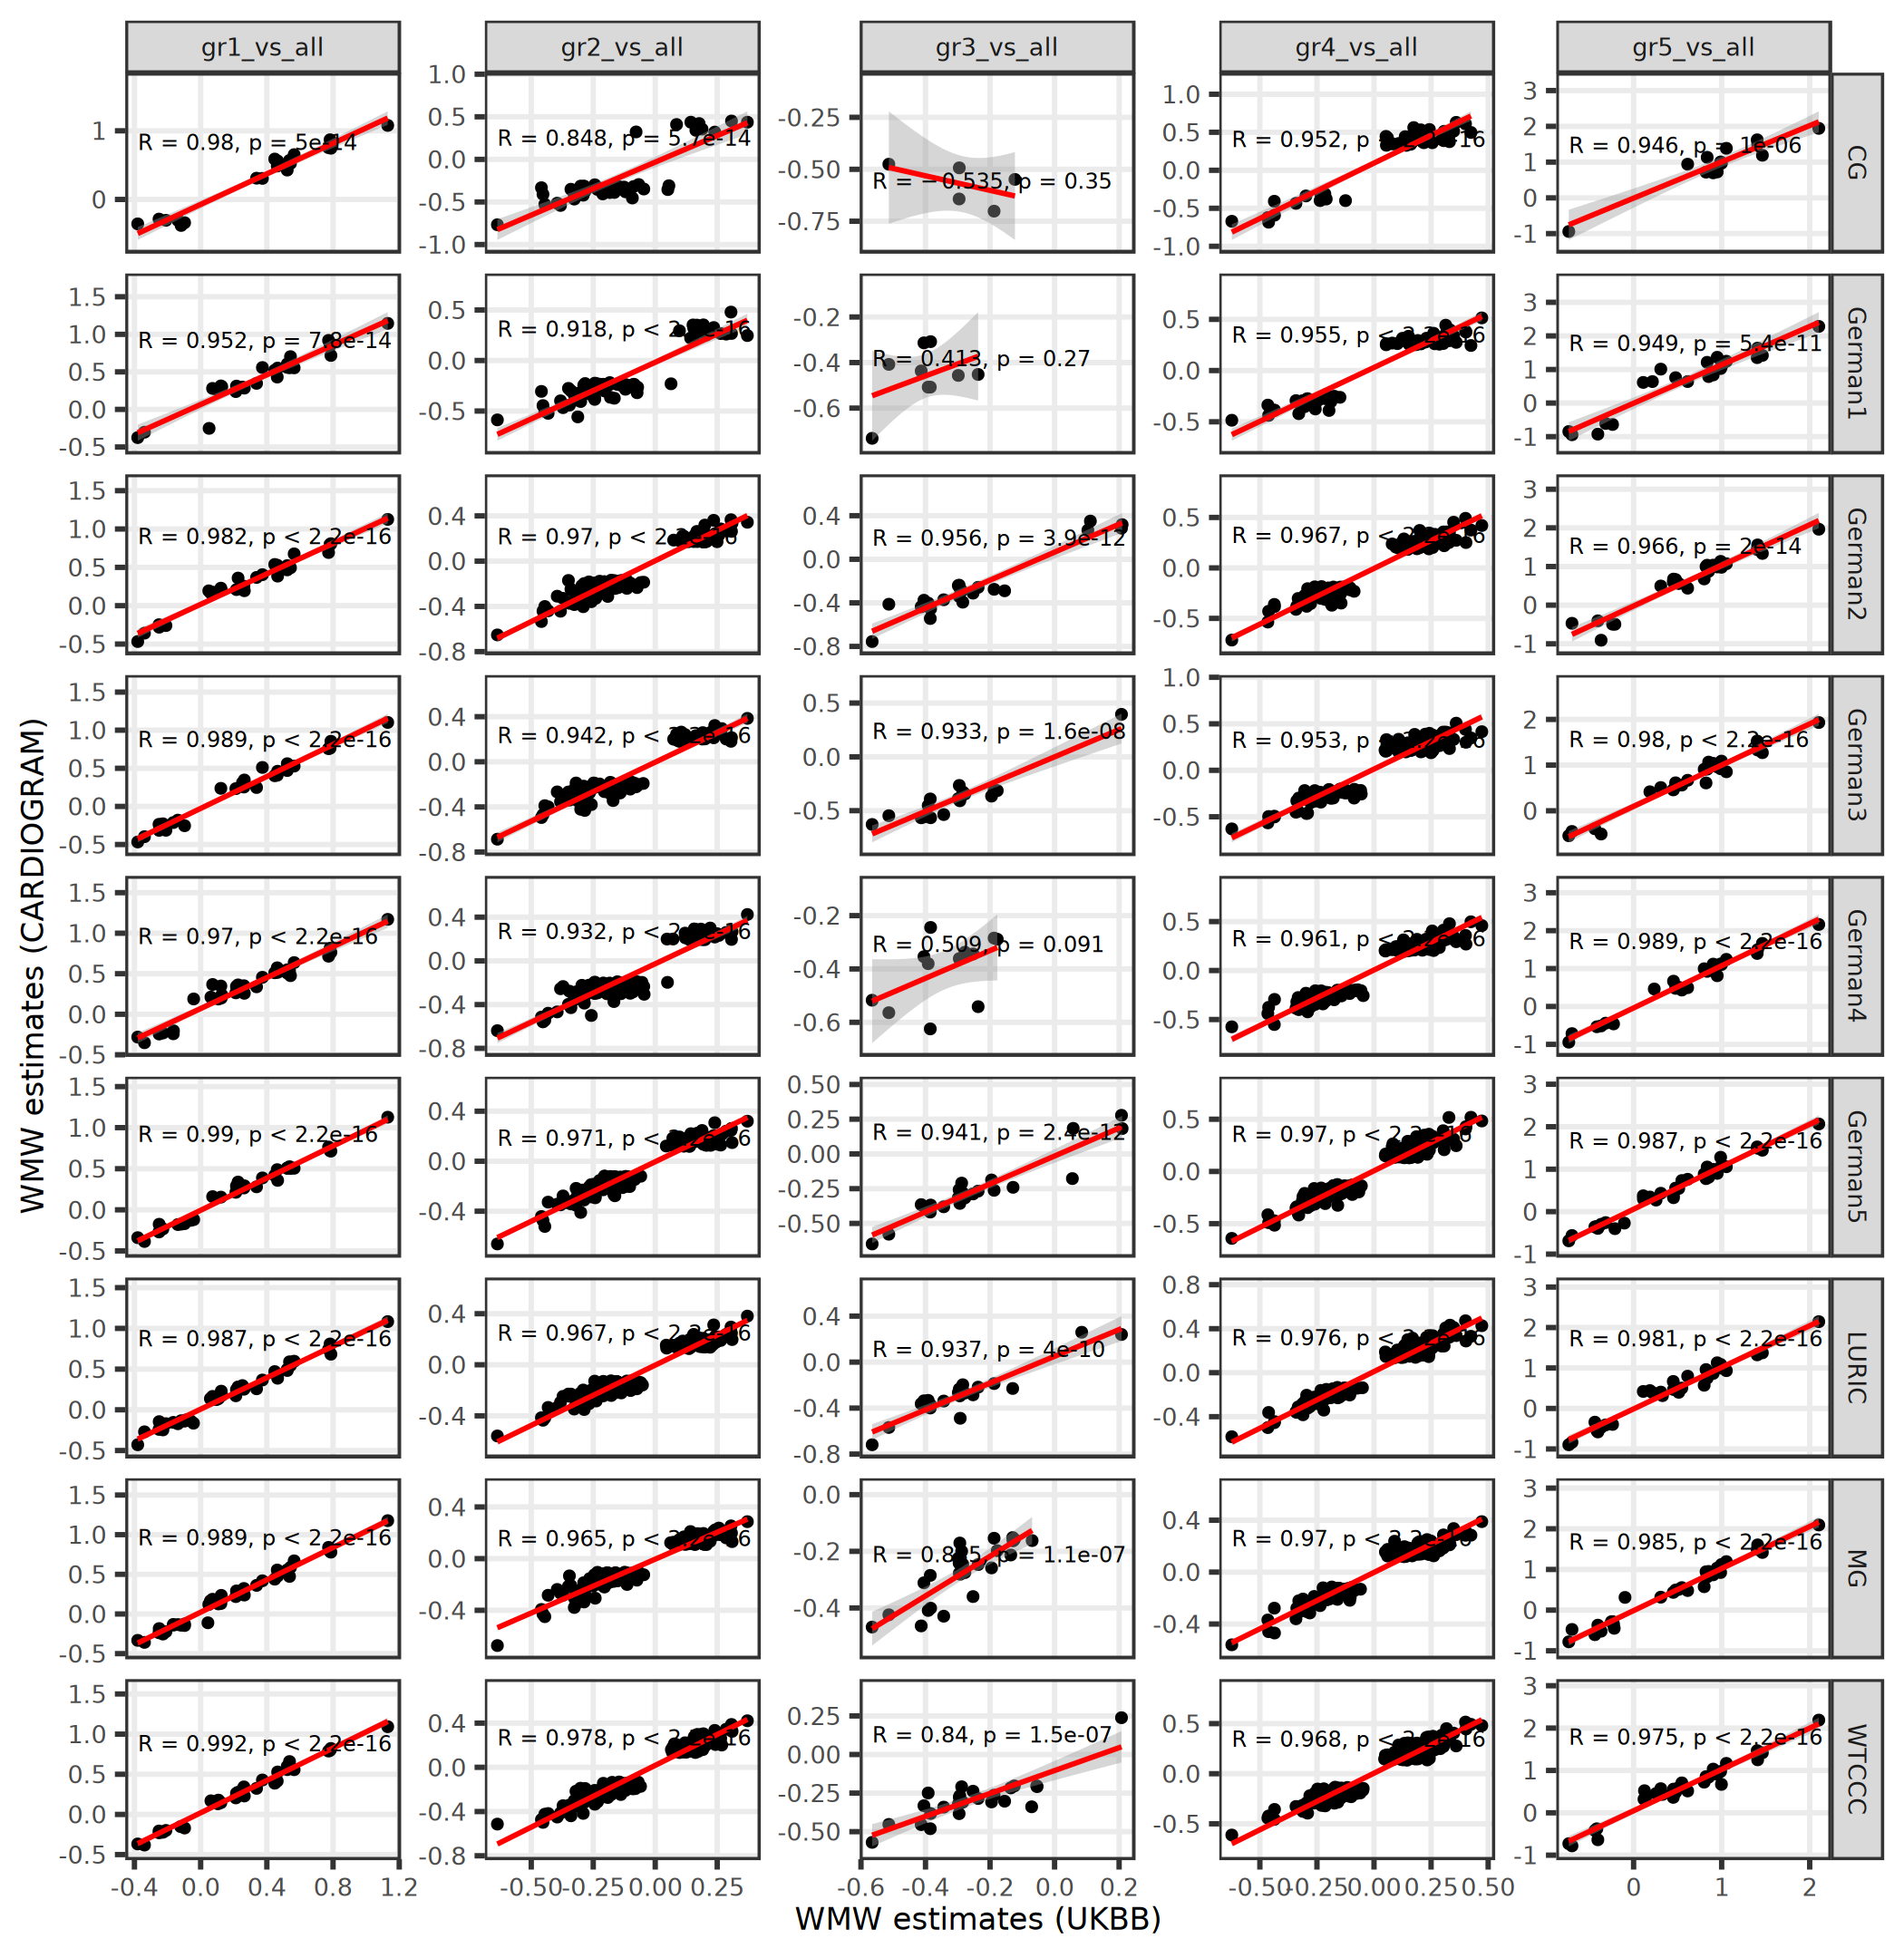

In [8]:
options(repr.plot.height = 7.2, repr.plot.width = 7, repr.plot.res = 300)

(
  cpus <- ggplot(cohorts_pwu, aes(x = estimates_ukbb, y = estimates)) + 
    geom_point(size = 0.7) + 
    geom_smooth(method = "lm", colour = "red", linewidth = 0.5) + 
    ggh4x::facet_grid2(cohort ~ comp, scales = "free", independent = "y") + 
    ggpubr::stat_cor(r.accuracy = 0.001, size = 2) +
    scale_y_continuous(expand = expansion(mult = c(0.1, 0.3))) + 
    labs(x = "WMW estimates (UKBB)", y = "WMW estimates (CARDIOGRAM)") + 
    theme_bw() +
    theme(text = element_text(size = 8), panel.grid.minor = element_blank())
)

In [114]:
ggsave("/scratch/tmp/dolgalev/castom-igex-revision/results/path_wmw_estimates_ukbb_cardiogram_scatter_lm_cor.pdf", cpus, height = 7.4, width = 7, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
